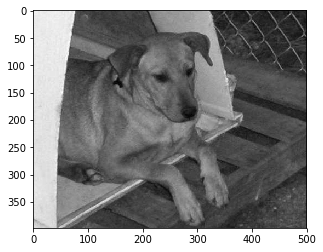

(398, 500)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Chaitany/Desktop/github/ML-Dl-RL-random-codes/DL/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

print(img_array.shape)

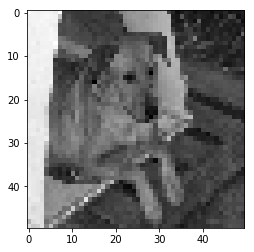

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
# plt.show()


In [4]:


training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
    

100%|████████████████████████████████████████████████████████████████████████████| 12485/12485 [03:20<00:00, 98.60it/s]


24914


In [5]:
import random
random.shuffle(training_data)

In [8]:
X = []
y = []


for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[13]
   [10]
   [ 8]
   ...
   [ 7]
   [ 5]
   [ 7]]

  [[26]
   [11]
   [15]
   ...
   [ 8]
   [ 5]
   [ 7]]

  [[34]
   [18]
   [19]
   ...
   [ 9]
   [ 6]
   [ 8]]

  ...

  [[22]
   [13]
   [25]
   ...
   [43]
   [81]
   [32]]

  [[18]
   [ 9]
   [36]
   ...
   [56]
   [45]
   [26]]

  [[11]
   [ 8]
   [29]
   ...
   [57]
   [47]
   [48]]]]


In [11]:
import pickle

pickle_out = open("X-cats-dogs.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y-cats-dogs.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X-cats-dogs.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y-cats-dogs.pickle","rb")
y = pickle.load(pickle_in)

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Chaitany\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Chaitany\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Chaitany\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Chaitany\Anaconda3\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Chaitany\Anaconda3\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (m

TypeError: must be str, not list

In [9]:
from tensorflow import keras